# Spark Foundation Assignment

## Task - 6

### Prediction using Decision Tree

### Submitted by Ankita Bhattacharjee

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets

df_iris=pd.read_csv('C:/Users/S/Downloads/Iris - Iris (1).csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris.shape

(150, 6)

Thus there are 150 rows and 6 columns

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


All the four columns contains float datatype

In [6]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Checking if the dataset contains any null values

In [7]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Thus our dataset donot contain any null values

In [8]:
#Checking if the dataset contains any duplicatet values
df_iris.duplicated().sum()


0

Thus the dataset contains only one duplicate values.

In [9]:
#As the column Id is of no use in our analysis so we will remove it
df_iris.drop('Id', axis=1, inplace=True)


In [10]:
df_iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
x= df_iris.drop('Species',axis=1)
y=df_iris['Species']

## Diving the data into train-test Split 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
data= DecisionTreeClassifier(criterion='entropy')


In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [16]:
X_train.shape

(120, 4)

In [17]:
y_train.shape

(120,)

In [18]:
tree=data.fit(X_train,y_train)

In [19]:
y_pred=data.predict(X_test)

### Calculating Precision, recall, f1 score

In [20]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [21]:
accuracy_score(y_pred,y_test)

1.0

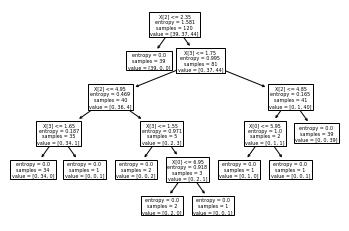

In [22]:
from sklearn import tree
tree.plot_tree(data);

In [23]:
df=list(df_iris.columns.values)
df

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

## Visualising The Tree

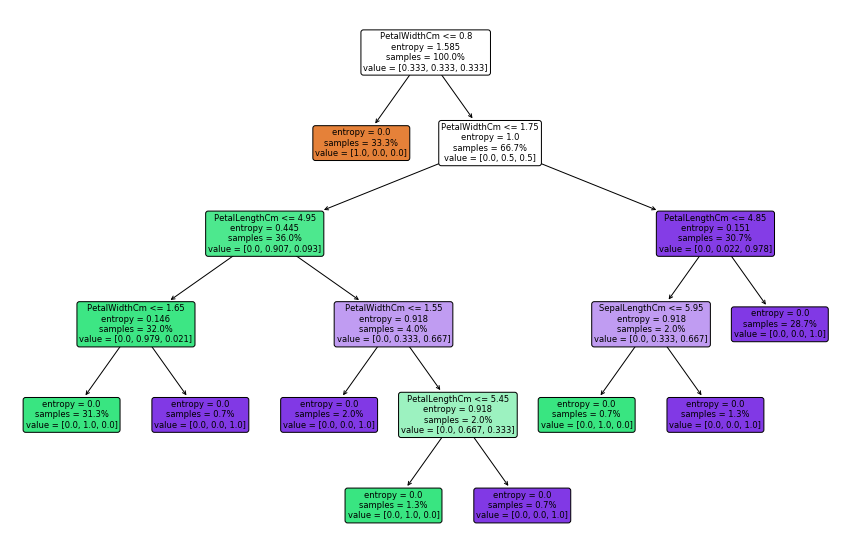

In [27]:
plt.figure(figsize=(15,10))
tree.plot_tree(data.fit(x,y),feature_names=df,filled=True,precision=3,proportion=True,rounded=True)
plt.show()